# 接口设计简介(TODO)

参考：[oo-design](https://d2l.ai/chapter_linear-regression/oo-design.html)

## 实用程序

需要一些实用程序来简化 Jupyter Notebook 中的面向对象编程。

### 于类外添加类方法

实用函数 {func}`~torch_book.add_to_class` 允许在创建类之后将函数注册为类中的方法。事实上，即使已经创建了类的实例，也可以这样做！它允许将类的实现拆分为多个代码块。

In [1]:
def add_to_class(Class):
    def wrapper(obj):
        setattr(Class, obj.__name__, obj)
    return wrapper

比如计划实现类 `A` 的方法 `do`。可以先声明类 `A` 并创建实例 `a`，而不是在同一个代码块中同时拥有 `A`和 `do` 的代码。

In [2]:
class A:
    def __init__(self):
        self.b = 1

a = A()

接下来，按照通常的方式定义方法 `do`，但不在类 `A` 的范围内。相反，我们用 `add_to_class` 修饰这个方法，用类 `A` 作为它的参数。在这样做的过程中，该方法能够访问 `A` 的成员变量，就像期望的那样，如果它被定义为 `A` 定义的一部分。

In [3]:
@add_to_class(A)
def do(self):
    print('类属性 "b" 是', self.b)
a.do()

类属性 "b" 是 1


### 交互式绘图

在实验进行时交互式地绘制实验进展。

In [4]:
import sys
sys.path.extend(["../../src"])

In [5]:
from torch_book.plotx import BoardX

{meth}`~torch_book.plotx.BoardX.draw` 函数在图中绘制点 `(x, y)`，并在图例中指定标签。可选的 `every_n` 通过仅显示图中 $1/n$ 的点来平滑直线。它们的值是从原始图中的相邻 $n$ 点取平均值。

在下面的例子中，用不同的平滑度画 `sin` 和 `cos`。如果运行此代码块，您将看到这些行在动画中增长。

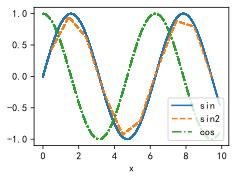

In [6]:
import numpy as np

board = BoardX("x")
for x in np.arange(0, 10, 0.1):
    board.draw(x, np.sin(x), 'sin', every_n=1)
    board.draw(x, np.sin(x), 'sin2', every_n=10)
    board.draw(x, np.cos(x), 'cos', every_n=1)